## 介绍



## 导入数据

第一步需要引入必要的包

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import jieba
import json
from wordcloud import WordCloud, STOPWORDS
from PIL import Image 

%matplotlib inline

导入数据文件 `items.csv`, 并命名为`jobs`

In [2]:
jobs = pd.read_csv('items.csv'); jobs.head(1)

,comp_id,salary,job_req,job_id,salary_min,comp_detail,job_desp,experience,salary_max,comp_name,address,education,job_title
0,https://www.liepin.com/company/182339/,23-38万,\n本科及以上 3年以上经验\n语言不限 年龄不限\n,https://www.liepin.com/job/1910030651.shtml,23.0,NaN,职责描述：1、服务策略研发：不定期进行专题分析，包括对酒店群、用户群、酒店服务的分析等，研发...,3年以上经验,38.0,携程,公司地址：上海市长宁区金钟路968号凌空SOHO,本科及以上,大数据分析挖掘/机器学习工程师


## 处理数据

按顺序保留如下列，存入新的变量`n_jobs`中：

```
['job_id', 'job_title','comp_name','salary','salary_min','salary_max','experience','job_desp','comp_id']

```

In [3]:
n_jobs = jobs[['job_id', 'job_title','comp_name','salary','salary_min','salary_max','experience','job_desp','comp_id']]

接下来：
- 将`experience`需要的工作年限变为数值型
- 分析下工作年限需要的分布
- 分析下工作年限跟薪水之间的关系
- 分析下工作职责描述中提到最多的技能项

In [4]:
def changeExp(x):
    pt_s = '(\d+)年以上经验'
    pt = re.compile(pt_s)
    if pt.match(x):
        gg = pt.search(x)
        return int(gg.group(1))
    elif x == '经验不限':
        return 0
    else:
        x = Null

n_jobs['experience'] = n_jobs['experience'].apply(changeExp);
# n_jobs = n_jobs.set_index('job_id')
n_jobs.head(1)

E:\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,job_id,job_title,comp_name,salary,salary_min,salary_max,experience,job_desp,comp_id
0,https://www.liepin.com/job/1910030651.shtml,大数据分析挖掘/机器学习工程师,携程,23-38万,23.0,38.0,3,职责描述：1、服务策略研发：不定期进行专题分析，包括对酒店群、用户群、酒店服务的分析等，研发...,https://www.liepin.com/company/182339/


工作年限的需求分布

In [5]:
total = ""

def removeToken(words):
    punc = u"1-9。,!！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏."
    ptn_s = u'[\s%s]+' % punc
    return re.sub(ptn_s, u"", words.decode('utf-8'))

def mergeTotal(words):
    global total
    total =  u'%s%s' % (total, words.decode('utf-8'))

n_jobs['job_desp'].map(mergeTotal)
print total[:100]

职责描述：1、服务策略研发：不定期进行专题分析，包括对酒店群、用户群、酒店服务的分析等，研发酒店提升客户服务策略并评效，提升平台转化率和客户体验，并改善收益。2、数据挖掘：根据业务需要，进行数据挖掘，


使用jieba分词统计词频，并使用停止词库过滤；

In [6]:
stopwords = []
with open('stopwords-zh.json') as f:
    stopwords = json.loads(f.read())

def is_no_means(word):
    punc = u"1-9\n\t\r\n。,!！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏."
    ptn_s = u'[%s]+' % punc
    pt = re.compile(ptn_s)
    if pt.search(word):
        return True
    else:
        return False
    
res = dict()
def statis_words(words):
    seqs = jieba.cut( words )
    for t in seqs:
        if t not in stopwords and not is_no_means(t) :
            if t in res:
                res[t] += 1
            else:
                res[t] = 1

statis_words(total)
                
fi_res = pd.DataFrame.from_dict(res, orient='index');fi_res.head(5)


Building prefix dict from the default dictionary ...
Loading model from cache c:\users\admin\appdata\local\temp\jieba.cache
Loading model cost 0.283 seconds.
Prefix dict has been built succesfully.


,0
智汇,1
谈,1
西部,2
编译,4
平安,9


In [7]:
ddd = fi_res.sort_values(0, ascending=False)[0].to_dict()

下一步,制作词云，参考1[http://blog.csdn.net/tanzuozhev/article/details/50789226](http://blog.csdn.net/tanzuozhev/article/details/50789226) 

2[http://blog.csdn.net/chenKFKevin/article/details/70937408](http://blog.csdn.net/chenKFKevin/article/details/70937408)

职责 描述 ： 1 、 服务 策略 研发 ： 不定期 进行 专题 分析 ， 包括 对 酒店 群 、 用户群 、 酒店 服务 的 分析 等 ， 研发 酒店 提升 客户服务 策略 并 评效 ， 提升 平台


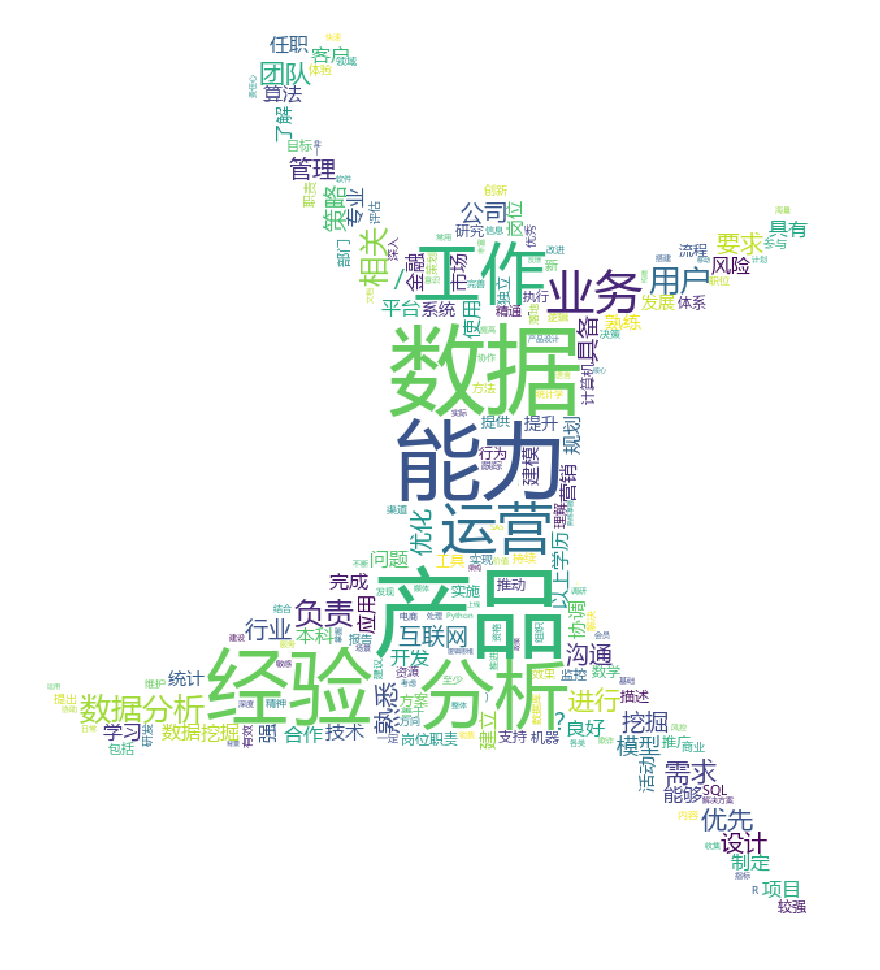

In [8]:
## 开始制作词云
seqs = jieba.cut( total )
word_c = ' '.join(seqs)
print word_c[0:100]

nsw = set(s.encode('utf-8') for s in stopwords)

#对分词后的文本生成词云  
doc_mask = np.array(Image.open("self_burned.jpg"))  
my_wordcloud = WordCloud(font_path='msyh.ttc',  
               background_color="white", 
               mask=doc_mask,  
               stopwords=nsw)  
# 生成词云  
my_wordcloud.generate_from_frequencies(ddd)  

plt.figure(figsize=(15,20))

#显示词云图  
plt.imshow(my_wordcloud)  
#是否显示x轴、y轴下标  
plt.axis("off")  
plt.show()  

In [141]:
## 开始制作词云

def is_en(word):
    ptn_s = u'^[a-zA-Z]+$'
    pt = re.compile(ptn_s)
    if pt.search(word):
        return True
    else:
        return False
# fi_res.sort_values(0, ascending=False)[0].reset_index()['index']
rrr = fi_res.sort_values(0, ascending=False)[0].reset_index()

ddd = rrr[rrr['index'].apply(is_en)]

print ddd.head(20)

dddd = ddd.set_index('index')[0].sort_values(ascending=False).to_dict()
# ddd.to_dict()

      index    0
92      SQL  744
122       R  588
146  Python  501
148     SAS  497
216  Hadoop  337
234   Spark  295
247    Java  274
259     APP  254
273    SPSS  240
275      BI  237
298    Hive  211
343  python  183
367   Excel  169
387     and  156
403     PPT  149
417   MySQL  139
447   excel  124
485  hadoop  115
508  Oracle  106
521     ETL  103


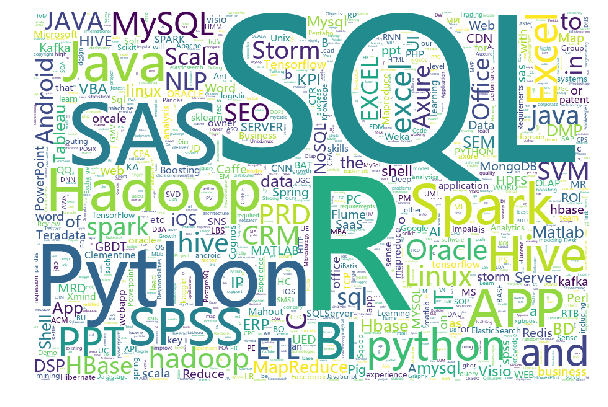

In [139]:
nsw = set(s.encode('utf-8') for s in stopwords)

#对分词后的文本生成词云  
my_wordcloud = WordCloud(font_path='msyh.ttc',  
               background_color="white", 
               width=900,
               height=600,
               relative_scaling=0.4,
               max_words=4000,
               stopwords=nsw)  
# 生成词云  
my_wordcloud.generate_from_frequencies(dddd)  
plt.figure(figsize=(10,13))

#显示词云图  
plt.imshow(my_wordcloud)  
#是否显示x轴、y轴下标  
plt.axis("off")  
plt.show()  